# Student Performance Predictor

## Import Dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

### Importing Dataset

In [2]:
df = pd.read_csv('../data/math_subject_grade_prediction.csv')

### Feature Engineering

In [3]:
df['Past_Performance_Grade'] = (df.G1 + df.G2) / 2
df['Parents_Education'] = (df.Medu + df.Fedu) / 2

In [4]:
df.drop(['school', 'G1', 'G2', 'Medu', 'Fedu'], axis=1, inplace=True)

In [5]:
df.columns=['Gender', 'Age', 'Locality', 'Family_Size', 'Parents_Cohab_Status', 'Mother_Job',
            'Father_Job', 'Reason_School_Choice', 'Guardian', 'Home_to_School_Travel_Time', 
            'Weekly_Study_Time', 'Past_Class_Failure_Count', 'School_Support', 'Family_Support',
            'Extra_Paid_Classes', 'Extra_Curr_Activities', 'Attended_Kindergarten', 'Higher_Edu',
            'Internet', 'Dating', 'Family_Relationship', 'Freetime_After_School', 'Goes_Out', 
            'Workday_Alcohol_Consumption', 'Weekend_Alcohol_Consumption', 'Current_Health_Status', 
            'School_Absences', 'Final_Grade', 'Past_Grade_Record', 'Parents_Education']

In [6]:
df['Alcohol_Consumption'] = (df.Workday_Alcohol_Consumption + df.Weekend_Alcohol_Consumption) / 2

In [7]:
df.drop(['Workday_Alcohol_Consumption', 'Weekend_Alcohol_Consumption'], axis=1, inplace=True)

### Feature Encoding

In [20]:
df.drop(['Guardian', 'Gender'], axis=1, inplace=True)

In [45]:
df.drop(['Reason_School_Choice'], axis=1, inplace=True)

In [46]:
# natural order in values
ord_cols = ['Parents_Cohab_Status', 'Family_Size', 'Attended_Kindergarten', 'Extra_Curr_Activities', 
           'Father_Job', 'Mother_Job', 'Family_Support', 'School_Support', 'Locality', 'Higher_Edu', 
            'Dating', 'Extra_Paid_Classes', 'Internet']

In [47]:
from sklearn.preprocessing import OrdinalEncoder

In [48]:
ord_enc = OrdinalEncoder()

In [49]:
ord_enc_cols = ord_enc.fit_transform(df[ord_cols])

In [50]:
print(ord_enc_cols.shape, len(ord_cols))

(395, 13) 13


In [51]:
df[ord_cols] = ord_enc_cols

In [54]:
df = df.astype(np.float32)

In [55]:
df.head()

,Age,Locality,Family_Size,Parents_Cohab_Status,Mother_Job,Father_Job,Home_to_School_Travel_Time,Weekly_Study_Time,Past_Class_Failure_Count,School_Support,...,Dating,Family_Relationship,Freetime_After_School,Goes_Out,Current_Health_Status,School_Absences,Final_Grade,Past_Grade_Record,Parents_Education,Alcohol_Consumption
0,18.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,0.0,1.0,...,0.0,4.0,3.0,4.0,3.0,6.0,6.0,5.5,4.0,1.0
1,17.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0,0.0,...,0.0,5.0,3.0,3.0,3.0,4.0,6.0,5.0,1.0,1.0
2,15.0,1.0,1.0,1.0,0.0,2.0,1.0,2.0,3.0,1.0,...,0.0,4.0,3.0,2.0,3.0,10.0,10.0,7.5,1.0,2.5
3,15.0,1.0,0.0,1.0,1.0,3.0,1.0,3.0,0.0,0.0,...,1.0,3.0,2.0,2.0,5.0,2.0,15.0,14.5,3.0,1.0
4,16.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,...,0.0,4.0,3.0,2.0,5.0,4.0,10.0,8.0,3.0,1.5


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         395 non-null    float32
 1   Locality                    395 non-null    float32
 2   Family_Size                 395 non-null    float32
 3   Parents_Cohab_Status        395 non-null    float32
 4   Mother_Job                  395 non-null    float32
 5   Father_Job                  395 non-null    float32
 6   Home_to_School_Travel_Time  395 non-null    float32
 7   Weekly_Study_Time           395 non-null    float32
 8   Past_Class_Failure_Count    395 non-null    float32
 9   School_Support              395 non-null    float32
 10  Family_Support              395 non-null    float32
 11  Extra_Paid_Classes          395 non-null    float32
 12  Extra_Curr_Activities       395 non-null    float32
 13  Attended_Kindergarten       395 non

### Visualizing Feature Correlations

In [57]:
corr_matrix = df.corr()

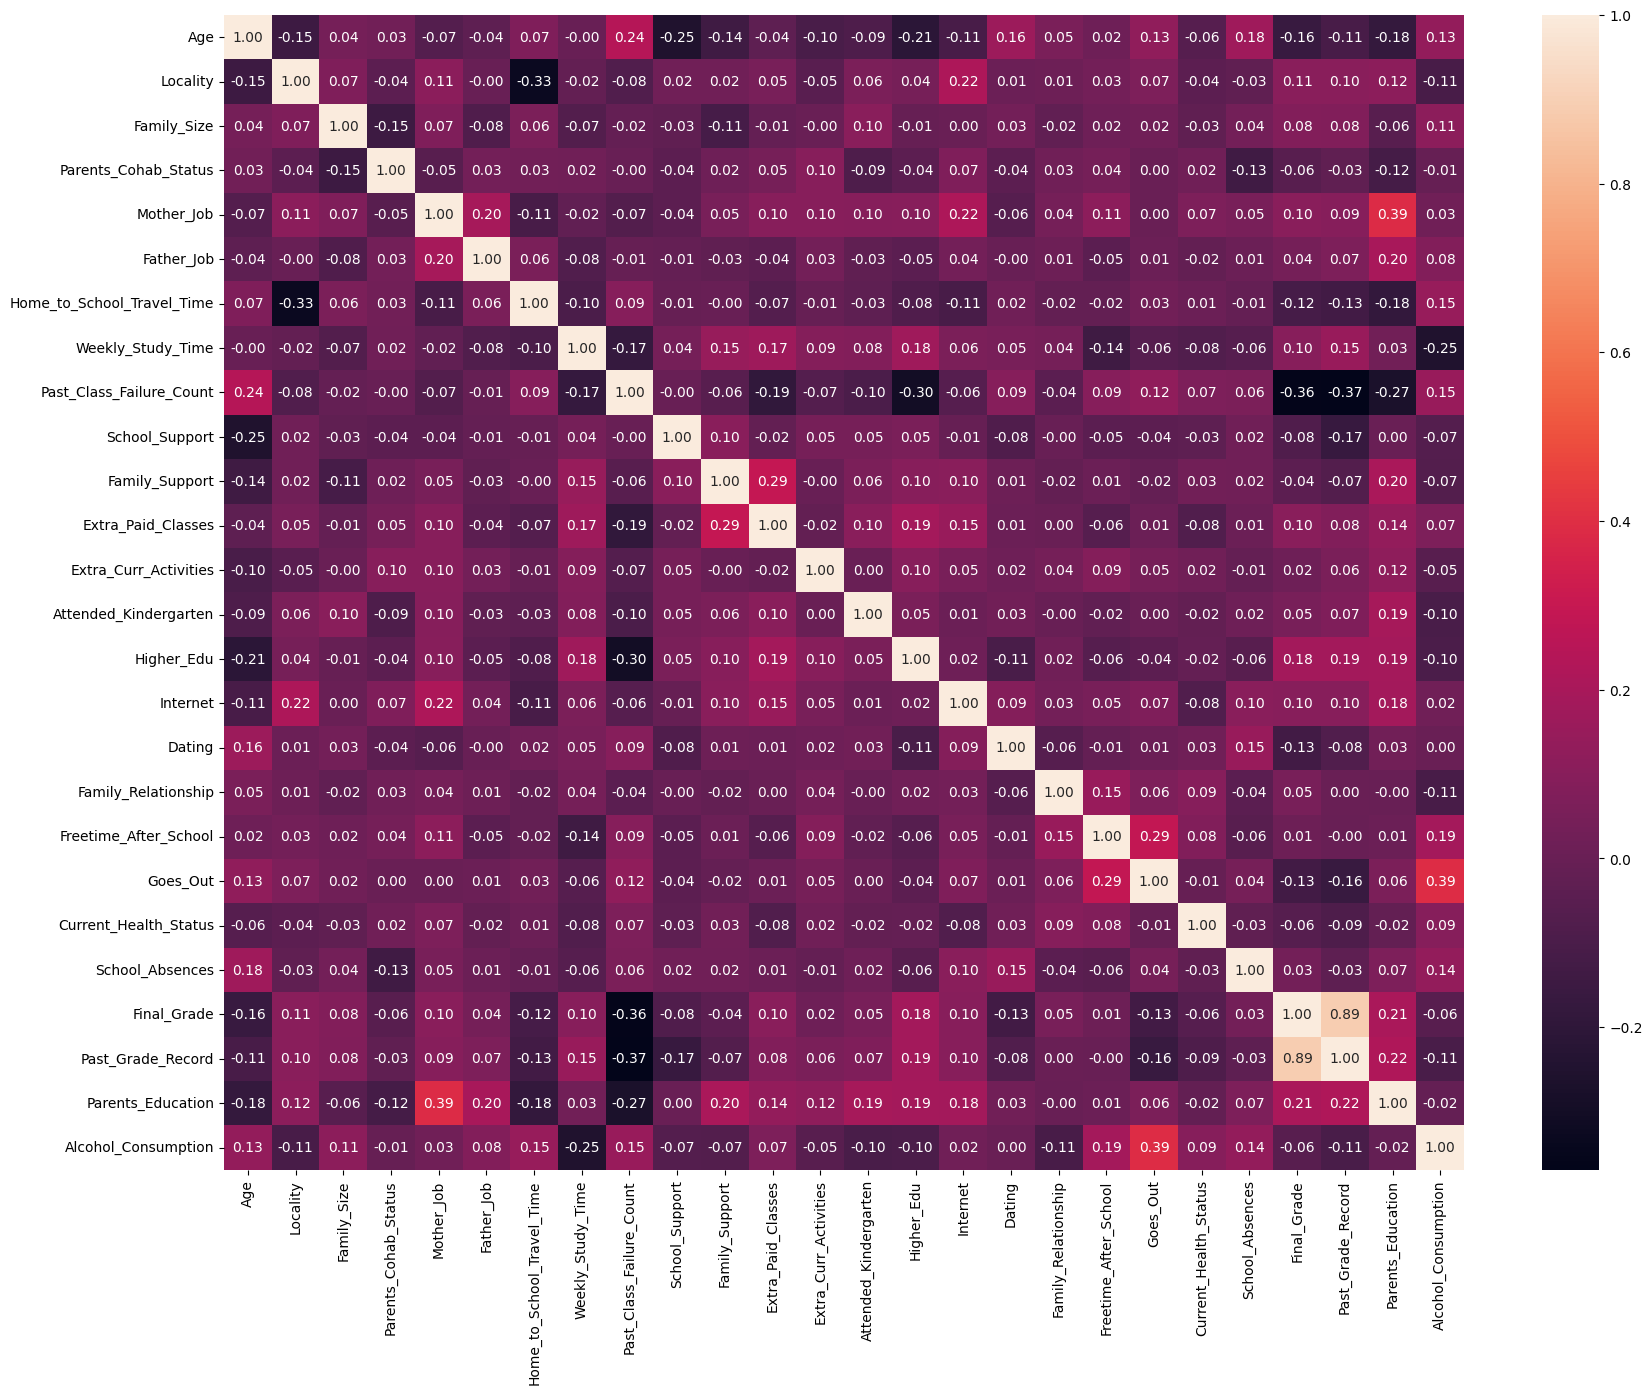

In [58]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

### Dataset Splitting into Train and Test Sets

In [66]:
X = df.drop(['Final_Grade'], axis=1)
Y = df['Final_Grade']

### Feature Selection

In [73]:
df.shape, X.shape

((395, 26), (395, 25))

In [334]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
k_best = SelectKBest(mutual_info_regression, k=15)
selected_cols = k_best.fit(X, Y)
X_k_new = k_best.fit_transform(X, Y)

In [335]:
feature_scores = {}

for col, score in zip(X.columns, k_best.scores_):
    feature_scores[col] = round(float(score), 4)

In [336]:
feature_scores

{'Age': 0.0494,
 'Locality': 0.0101,
 'Family_Size': 0.0437,
 'Parents_Cohab_Status': 0.0142,
 'Mother_Job': 0.0428,
 'Father_Job': 0.0891,
 'Home_to_School_Travel_Time': 0.0219,
 'Weekly_Study_Time': 0.0574,
 'Past_Class_Failure_Count': 0.1558,
 'School_Support': 0.0329,
 'Family_Support': 0.0,
 'Extra_Paid_Classes': 0.0322,
 'Extra_Curr_Activities': 0.0,
 'Attended_Kindergarten': 0.0045,
 'Higher_Edu': 0.0663,
 'Internet': 0.0459,
 'Dating': 0.0277,
 'Family_Relationship': 0.0011,
 'Freetime_After_School': 0.0068,
 'Goes_Out': 0.0485,
 'Current_Health_Status': 0.0526,
 'School_Absences': 0.2433,
 'Past_Grade_Record': 1.2644,
 'Parents_Education': 0.0176,
 'Alcohol_Consumption': 0.0761}

In [337]:
X_k_new

array([[18. ,  0. ,  0. , ...,  6. ,  5.5,  1. ],
       [17. ,  0. ,  0. , ...,  4. ,  5. ,  1. ],
       [15. ,  1. ,  0. , ..., 10. ,  7.5,  2.5],
       ...,
       [21. ,  0. ,  2. , ...,  3. ,  9. ,  3. ],
       [18. ,  1. ,  3. , ...,  0. , 11.5,  3.5],
       [19. ,  1. ,  2. , ...,  5. ,  8.5,  3. ]],
      shape=(395, 15), dtype=float32)

### Dataset Scaling

In [338]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_k_new, Y, test_size=0.25, random_state=42)

In [339]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()  # ---> highest RFR performance (RFR model performs best) 

x_train_scaled = rob_scaler.fit_transform(x_train)
x_test_scaled = rob_scaler.transform(x_test)

In [340]:
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

### Model Training

In [341]:
lr = LinearRegression()
hgbr = HistGradientBoostingRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)
abr = AdaBoostRegressor()
knr = KNeighborsRegressor()

In [342]:
lr.fit(x_train_scaled, y_train)
hgbr.fit(x_train_scaled, y_train)
rfr.fit(x_train_scaled, y_train)
abr.fit(x_train_scaled, y_train)
knr.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [343]:
lr_preds = lr.predict(x_test_scaled)
hgbr_preds = hgbr.predict(x_test_scaled)
rfr_preds = rfr.predict(x_test_scaled)
abr_preds = abr.predict(x_test_scaled)
knr_preds = knr.predict(x_test_scaled)

In [344]:
from sklearn.metrics import r2_score, mean_absolute_error

In [345]:
print(f'LR Accuracy: {round(r2_score(y_test, lr_preds), 4)*100}%')
print(f'RFR Accuracy: {round(r2_score(y_test, rfr_preds), 4)*100}%')
print(f'HGBR Accuracy: {round(r2_score(y_test, hgbr_preds), 4)*100}%')
print(f'ABR Accuracy: {round(r2_score(y_test, abr_preds), 4)*100}%')
print(f'KNR Accuracy: {round(r2_score(y_test, knr_preds), 4)*100}%')

LR Accuracy: 78.51%
RFR Accuracy: 87.22999999999999%
HGBR Accuracy: 83.49%
ABR Accuracy: 85.08%
KNR Accuracy: 55.36%


In [361]:
from pickle import dump

# with open('../models/trained_rfr_model.pkl', 'wb') as f:
#     dump(rfr, f)

# with open('../models/trained_hgbr_model.pkl', 'wb') as f:
#     dump(hgbr, f)

# with open('../models/trained_abr_model.pkl', 'wb') as f:
#     dump(abr, f)

In [362]:
mean_absolute_error(y_test, rfr_preds)

1.0887878787878786

### Test for variance and bias

In [347]:
# 1. predicting the y_train values to test the bias level
y_train_pred = rfr.predict(x_train_scaled)
print(f'RFR_rob_train Accuracy: {round(r2_score(y_train, y_train_pred), 5)*100}%')

# 2. predicting the y_test values to test the variance level
print(f'RFR_rob_test Accuracy: {round(r2_score(y_test, rfr_preds), 4)*100}%')

# low bias and somewhat higher variance suggests possible overfitting tendency of model.

RFR_rob_train Accuracy: 97.924%
RFR_rob_test Accuracy: 87.22999999999999%


### Plotting the predictions vs original target values

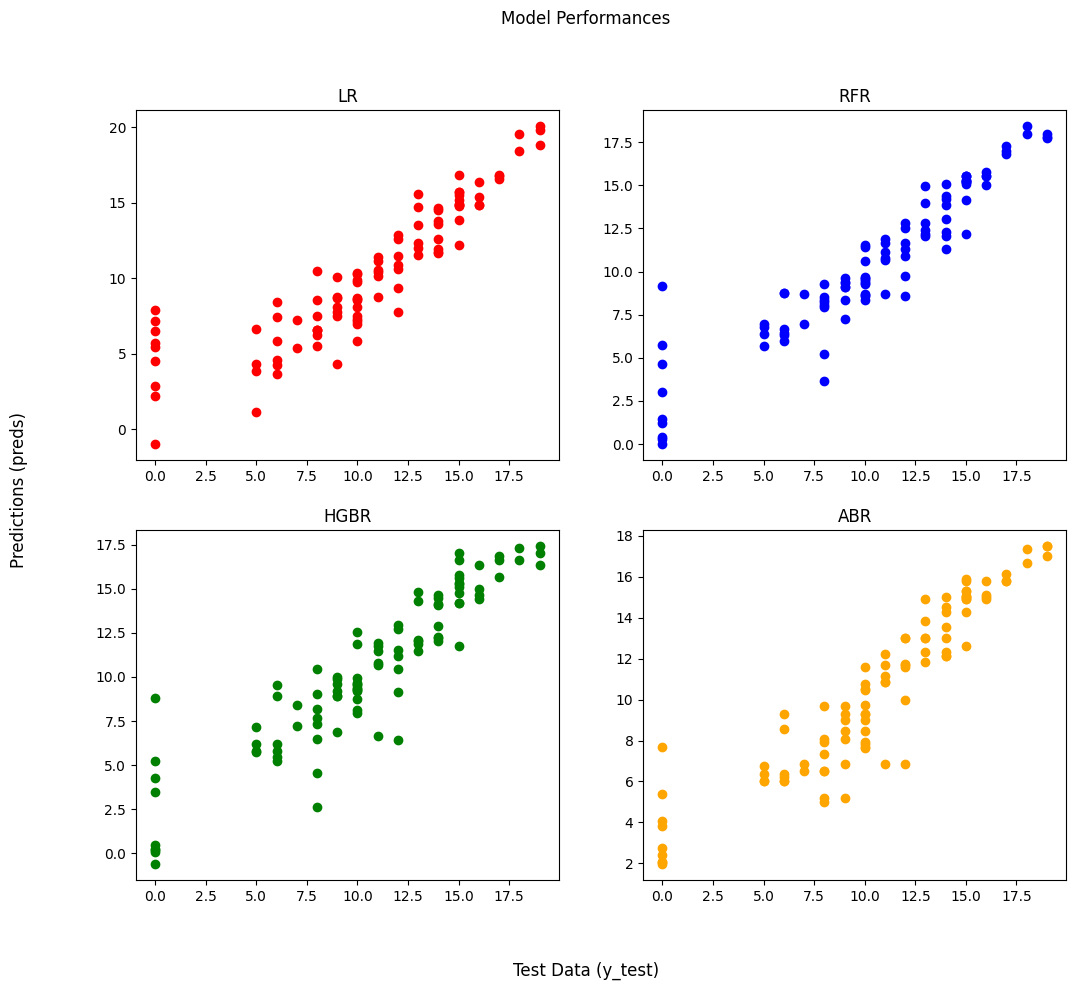

In [363]:
fig, axs = plt.subplots(2,2, figsize=(12,10))
fig.suptitle('Model Performances')
fig.supxlabel('Test Data (y_test)')
fig.supylabel('Predictions (preds)')

axs[0][0].scatter(y_test, lr_preds, color='red')
axs[0][0].set_title('LR')
axs[0][1].scatter(y_test, rfr_preds, color='blue')
axs[0][1].set_title('RFR')
axs[1][0].scatter(y_test, hgbr_preds, color='green')
axs[1][0].set_title('HGBR')
axs[1][1].scatter(y_test, abr_preds, color='orange')
axs[1][1].set_title('ABR')

plt.savefig('../reports/Models_Performance.png')